In [51]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [52]:
speed = [99, 96, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
generatedArray = np.random.uniform(0.0, 5.0, 250) #250 value array of values between 0 and 5

print(np.percentile(ages, 75)) #prints 43 because 75% of the people/values are 43 or younger/lower
print(generatedArray)
print("generatedArray Median =", np.median(generatedArray))
print("generatedArray Mode=", stats.mode(generatedArray))
print(np.percentile(generatedArray, 60))

43.0
[2.12819622 4.8219845  0.91343166 3.72519129 1.69831636 3.25546097
 3.20558281 1.1155131  3.75126633 2.27039151 0.87822344 1.27507115
 3.62815038 1.95487132 1.93291729 3.67342652 4.86775656 1.21168752
 1.03309376 2.12204682 3.58967409 4.25836137 1.75361768 1.8164732
 1.68146486 2.03089218 0.30153803 0.64422442 2.59262515 4.41760842
 0.81669634 3.64031468 1.0895366  4.17482926 0.50337832 1.82739192
 2.94548556 2.35347502 1.82943284 4.85273878 2.66192454 2.01397471
 0.20622976 1.39953579 3.33277049 0.09264794 1.0402081  0.11358292
 0.26745085 2.1606655  1.43726344 1.1819361  3.63514149 1.02111263
 0.99948091 3.45430025 1.24784844 0.71497612 0.65639615 4.72329438
 1.07121439 3.39710705 2.36946453 2.87223171 2.08156595 0.66581516
 1.65328451 0.72210231 4.18371766 2.06508323 0.14890873 4.25214916
 1.15272808 4.52961298 1.56193921 2.3366834  4.79853    4.33959237
 1.09393472 3.52390379 2.24206728 0.45233991 2.56255398 1.63435881
 4.32647672 3.72769405 1.82633017 3.74482517 2.53385918 1.

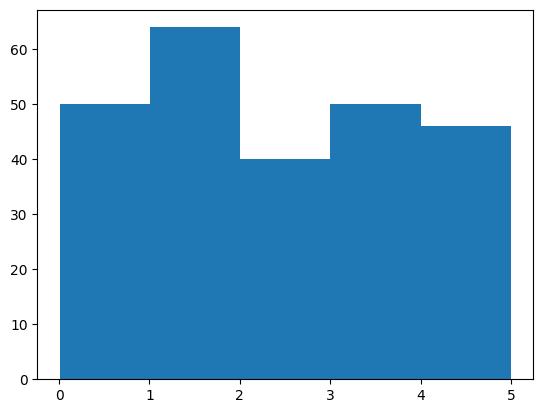

In [53]:
plt.hist(generatedArray, 5)
plt.show()

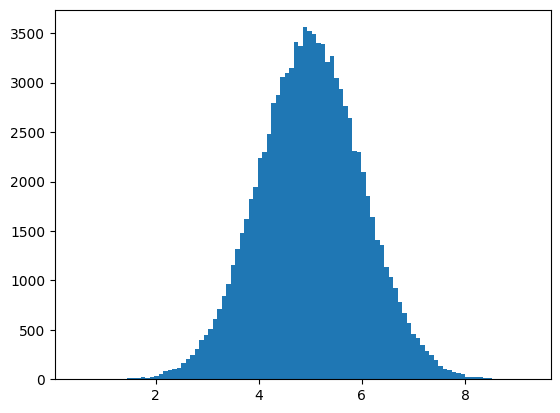

In [54]:
arr2 = np.random.normal(5.0, 1.0, 100000) #random array of 1000000 values centered around 5 with standard deviation 1
plt.hist(arr2, 100)
plt.show()

# Linear Regression

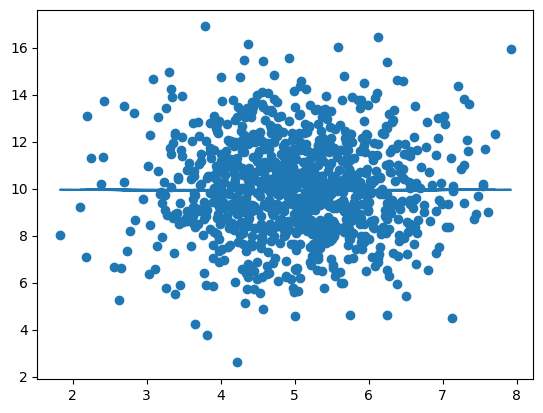

r = 0.008849313354716414


In [55]:
arr3 = np.random.normal(5.0, 1.0, 1000)
arr4 = np.random.normal(10.0, 2.0, 1000)


slope, intercept, r, p, std_err = stats.linregress(arr3, arr4) #the values of this line are fed by stats.linregress(arr3, arr4) and each have a separate value

def someFunc(arr3):
    return np.sin(arr3) * slope + intercept

simpleModel = list(map(someFunc, arr3))

plt.scatter(arr3, arr4)
plt.plot(arr3, simpleModel)
plt.show()

print("r =", r)

An obscenely low r or rsquared means dataset may not be a fit for the regression you're trying

In [56]:
# Using function to predict values

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed)

85.59308314937454


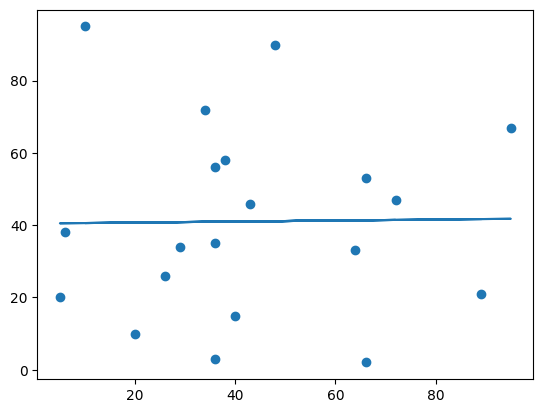

0.013318141542974908


In [57]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)

# Polynomial Regression

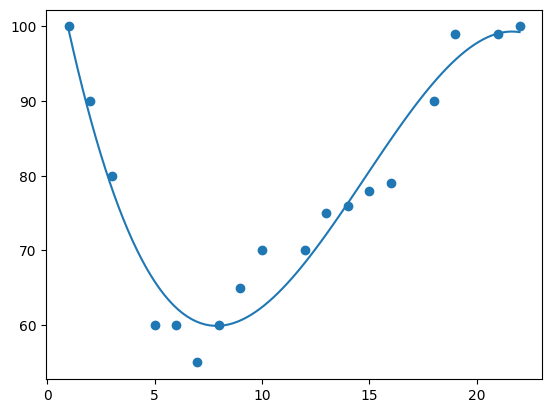

0.9432150416451025
88.87331269697988


In [58]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

polyModel = np.poly1d(np.polyfit(x, y, 3)) #method for creating polynomial model

polyLine = np.linspace(1, 22, 100) #specifies how the line will display, (start, end, something)

plt.scatter(x, y) #draw scatter plot
plt.plot(polyLine, polyModel(polyLine)) #plot line of polynomial regression onto drawn plot
plt.show()
print(r2_score(y, polyModel(x))) #like normal r but btwn 0 and 1 (1 being 100% related)
print(polyModel(17)) #predicted based on polynomial regression on original scatter plot

# Multiple Regression
Like linear regression, but more than one independent value, meaning two or more variables can be predicted

In [59]:
# we'll be using the data.csv I got from w3schools for this

dataFile = df = pandas.read_csv("data.csv")
X = df[['Weight', 'Volume']] #need two brackets because 2D array; this will be our independent variable
y = df['CO2'] #dependent variable

regr = linear_model.LinearRegression() #method to create linear regression object
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]]) #predicts C02 emission of a car where the weight is 2300 and the volume is 1300
print(predictedCO2)

print(regr.coef_) #coef_ is the relationship with an unknown variable, should print [coefficient value of weight against CO2, coef value of volume against CO2]

[114.75968007]
[0.00755095 0.00780526]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Scale
If things are in different units or proportions, and they create errors inside your model, you can scale everything to fit better

Standardization method: 
z = (x - u) / s    ;    z is the new value, x is the original value, u is the mean, and s is the standard deviation

In [60]:
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [61]:
scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Train/Test
The big boy stuff, finally

https://www.w3schools.com/python/python_ml_train_test.asp

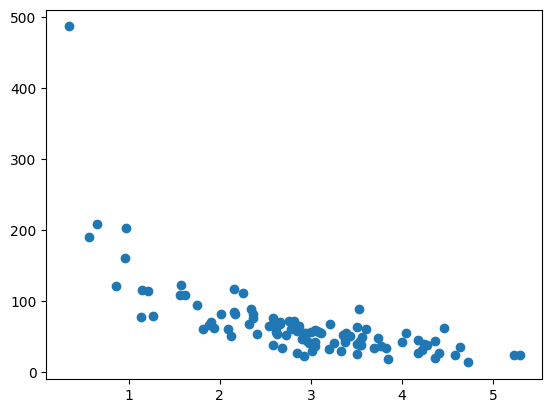

In [62]:
e = 2.71828

np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()



In [63]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

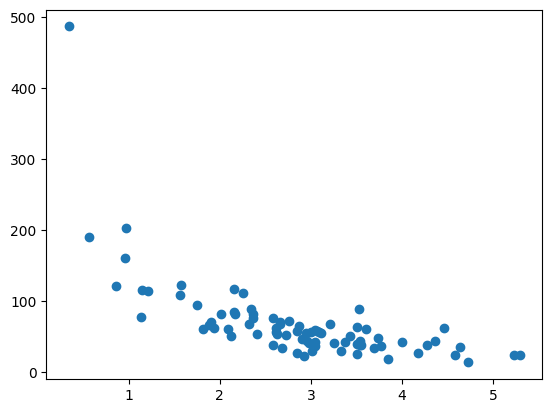

In [64]:
# Training Set
plt.scatter(train_x, train_y)
plt.show()

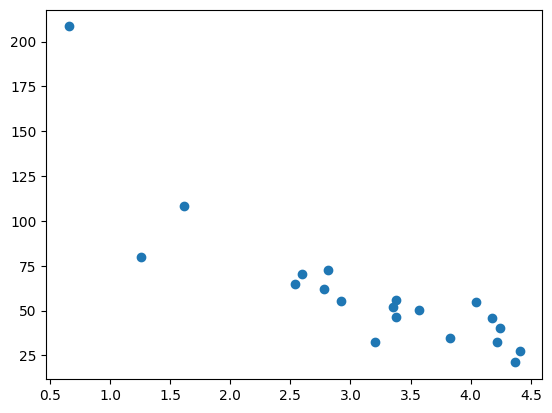

In [65]:
# Testing Set
plt.scatter(test_x, test_y)
plt.show()

r2 = 0.7988645544629798


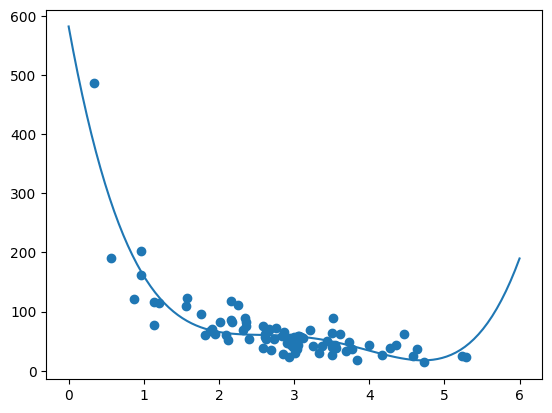

In [66]:
# Finding fit with polynomial regression

trainModel = np.poly1d(np.polyfit(train_x, train_y, 4)) # deg means degree of polynomial
trainLine = np.linspace(0, 6, 100)
r2 = r2_score(train_y, trainModel(train_x))

print("r2 =", r2)
plt.scatter(train_x, train_y)
plt.plot(trainLine, trainModel(trainLine))
plt.show()

In [67]:
# Model created, now test with test set

r2 = r2_score(test_y, trainModel(test_x))
print("Confidence\\Accuracy =", r2)

# Predicting values
print("Predicted value at 5:", trainModel(5))

Confidence\Accuracy = 0.8086921460343579
Predicted value at 5: 22.879625918117654


# Decision Trees
Helps make decisions based on previous experience

In [68]:
df = pandas.read_csv("data2.csv")
print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [69]:
# This is going to use pandas "map()" to map values that aren't numerical to 
# ones that are utilizing a dictionary of what to convert to what
dictionary = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(dictionary)
dictionary = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(dictionary)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [70]:
# We're going to have a feature and a target column, so we try to predict targets column based on feature column
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

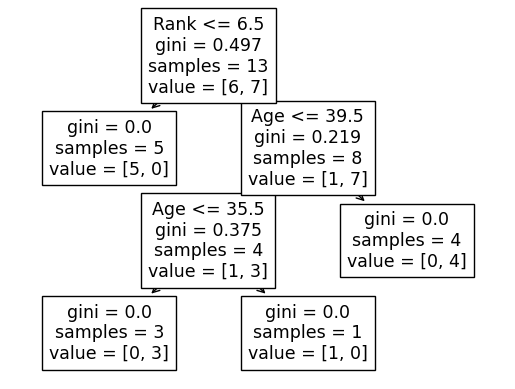

In [71]:
# Taking mapped data and creating the decision tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

### Regarding the above:
<ul>
<li>Rank has to do with the condition to go left(true) or right(false) down the tree</li>
<li>Gini (referring to the quality of the split)= 1 - (x/n)^2 - (y/n)^2
x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers<br>
("NO"), giving us the calculation:<br>
1 - (7/13)^2 - (6/13)^2 = 0.497</li>
<li>Samples is the number of people left at this point in the decision</li>
<li>Value is the split between true and false from the samples</li>
</ul>

In [75]:
# Testing prediction of model
# Format of arguments for predict method matches features, output will be value of 'Go'
print(dtree.predict([[40, 10, 7, 1]]))
print(dtree.predict([[40, 10, 6, 1]]))

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
